In [16]:
import ROOT
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# fileptr_1D = uproot.open("/depot/cms/top/bakshi3/TopSpinCorr_Run2_alt_version/CMSSW_10_6_29/src/TopAnalysis/Configuration/analysis/diLeptonic/TUnfoldResults_2016preVFP/Nominal/combined/c_kk.root")
fileptr_1D = uproot.open("/scratch/brown/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/TUnfoldResults_2016preVFP/Nominal/combined/c_kk.root")
fileptr_2D = uproot.open("/scratch/brown/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/TUnfoldResults_2016preVFP/Nominal/combined/c_kk_mttbar.root")

/home/bakshi3/.conda/envs/cent7/2020.11-py38/venv/lib/python3.10/site-packages/mplhep/utils.py:211: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  warnings.warn(


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f541714eb00>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

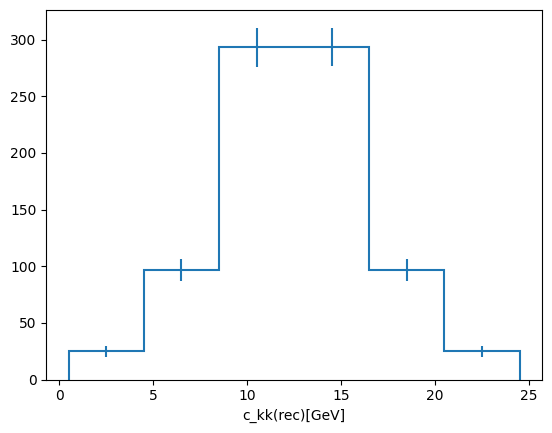

In [19]:
fileptr_1D['c_kkTUnfResultCor_rebinnedA'].to_hist().plot()

/home/bakshi3/.conda/envs/cent7/2020.11-py38/venv/lib/python3.10/site-packages/mplhep/utils.py:211: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  warnings.warn(


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f54171e6590>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

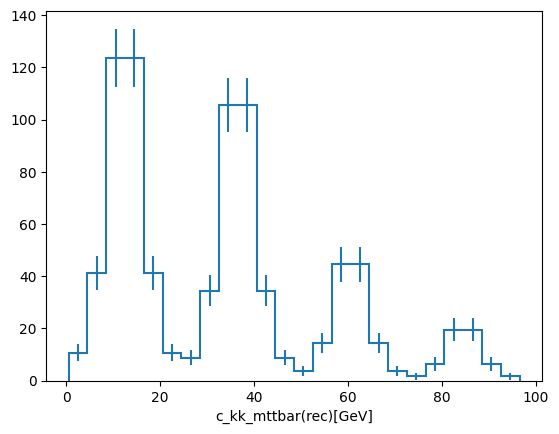

In [20]:
fileptr_2D['c_kk_mttbarTUnfResultCor_rebinnedA'].to_hist().plot()

## Now try to add bins of the 2D dist to 1D 
<center>
### $Y_{1D}$ = $\Sigma_{i}$ $(Y_{2D, i} \pm \sigma_{2D,i}) $ where $i$ is modulo 6 bins

In [21]:
unfolded_result_2D = fileptr_2D['c_kk_mttbarTUnfResultCor_rebinnedA'].to_numpy()[0]
unfolded_result_2D

array([ 10.72488535,  41.27820621, 123.68118614, 123.73913319,
        41.28167697,  10.72050911,   8.82313062,  34.42827624,
       105.56277202, 105.61022189,  34.42779729,   8.82297786,
         3.64628737,  14.54753655,  44.60543285,  44.62509725,
        14.54735167,   3.64622562,   1.61848466,   6.3545214 ,
        19.49664191,  19.50578458,   6.35452242,   1.61851427])

In [22]:
unfolded_ematrix_2D = fileptr_2D['c_kk_mttbarEmatrixCor_rebinnedA'].to_numpy()[0]
unfolded_error_2D   = np.sqrt([unfolded_ematrix_2D[i][i] for i in range(24)])
unfolded_error_2D

array([1.9901077 , 2.42912412, 2.59926674, 2.8231429 , 2.57925522,
       2.76390516, 1.57781177, 2.01607611, 2.59412252, 2.61104414,
       2.03791797, 1.59213887, 1.40791127, 1.8070524 , 2.37055203,
       2.37856535, 1.82717669, 1.4156218 , 1.04994921, 1.78870232,
       2.44649574, 2.44956512, 1.792341  , 1.05330695])

In [23]:
merged_unfolded_from_2D = np.zeros(6)
merged_error_from_2D    = np.zeros(6)

for i in [0, 6, 12, 18] :
    merged_unfolded_from_2D += unfolded_result_2D[i:i+6]
    merged_error_from_2D    += unfolded_error_2D[i:i+6]

In [24]:
merged_unfolded_from_2D

array([ 24.812788  ,  96.60854041, 293.34603293, 293.4802369 ,
        96.61134836,  24.80822686])

In [25]:
merged_error_from_2D

array([ 6.02577995,  8.04095495, 10.01043702, 10.26231752,  8.23669088,
        6.82497279])

### Load in the 1D unfolded result and errors

In [26]:
y_1D = fileptr_1D['c_kkTUnfResultCor_rebinnedA'].to_numpy()[0]
y_1D

array([ 24.83212025,  96.59066791, 293.34280381, 293.47630696,
        96.59061523,  24.8310837 ])

In [27]:
unfolded_ematrix_1D = fileptr_1D['c_kkEmatrixCor_rebinnedA'].to_numpy()[0]
unfolded_error_1D   = np.sqrt([unfolded_ematrix_1D[i][i] for i in range(6)])
unfolded_error_1D

array([1.80995022, 1.90617289, 2.22092164, 2.41566599, 2.33336001,
       2.23413536])

### Compare merged 2D to 1D

In [28]:
np.divide(merged_unfolded_from_2D, y_1D)

array([0.99922148, 1.00018503, 1.00001101, 1.00001339, 1.00021465,
       0.99907951])

In [29]:
np.divide(merged_error_from_2D, unfolded_error_1D)

array([3.32925175, 4.21837652, 4.50733463, 4.2482353 , 3.52997001,
       3.05486092])

### Ratios of cross-sections and errors

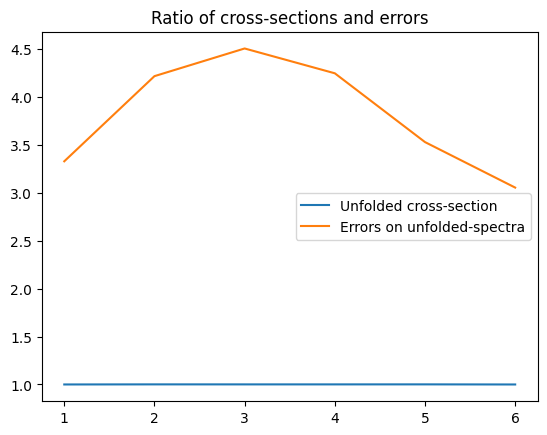

In [30]:
plt.title("Ratio of cross-sections and errors")
plt.plot(np.linspace(1,6,6), np.divide(merged_unfolded_from_2D, y_1D), label='Unfolded cross-section')
plt.plot(np.linspace(1,6,6), np.divide(merged_error_from_2D, unfolded_error_1D), label='Errors on unfolded-spectra')
plt.legend()